In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('Super_Store.csv',encoding='latin1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


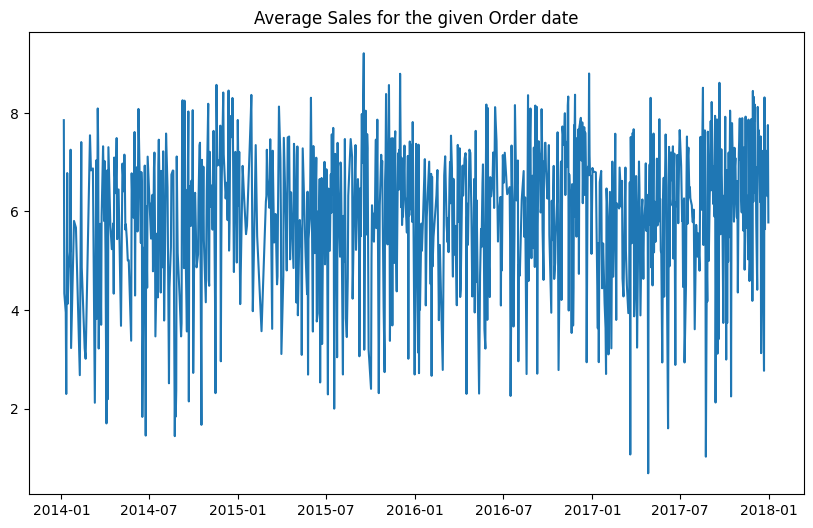

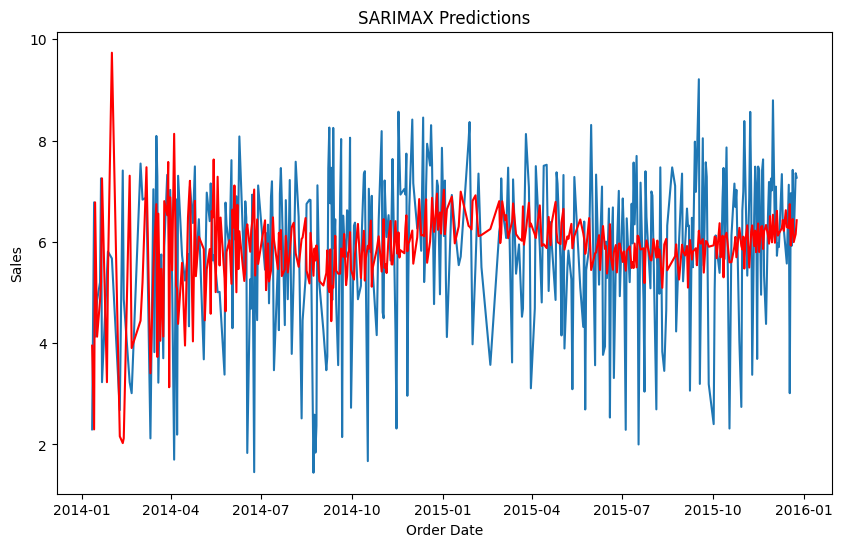

-0.219941371426023

In [ ]:
df1 = df.groupby('Order Date')['Sales'].sum().reset_index()
df1

# Convert 'Order Date' to datetime and assign it to df1['Order Date'
df1['Order Date'] = pd.to_datetime(df1['Order Date'])

# Set 'Order Date' as the index of df1
df1.set_index('Order Date', inplace=True)
df1 = df1.sort_index()
df1.index
df1
df1['Sales'] = np.log(df1['Sales'])

# Plotting the average sales
df1 = df1.sort_index()
avg_sales = df1['Sales']

plt.figure(figsize=(10,6))
plt.plot(avg_sales)
plt.title('Average Sales for the given Order date')

# Fit the SARIMAX model
sarimax_model = SARIMAX(avg_sales, order=(1,1,1), seasonal_order=(1,1,1,12))
sarimax_result = sarimax_model.fit()

# Prediction dates
start_date = '2014-01-11'
end_date = '2015-12-25'
prediction = sarimax_result.predict(start=start_date, end=end_date)


# Convert dates to datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)
actuals = df1.loc[start_date:end_date, 'Sales']
actuals = actuals[:len(prediction)]

# Plotting the actual vs predicted
plt.figure(figsize=(10,6))
plt.plot(actuals, label='Observed')
plt.plot(prediction, label='Predicted', color='red')
plt.title('SARIMAX Predictions')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()
r2 = r2_score(actuals, prediction)
r2


In [ ]:
[1,2,3,4,5,6,7,8,9,10,?]

Loop Through Data
The loop will iterate from 0 to 6 (len(data) - time_step - 1 = 10 - 3 - 1 = 6).

First Iteration (i = 0)
Extract Sequence: data[0:3, 0] -> [1, 2, 3]
Append to X: X = [[1, 2, 3]]
Extract Target: data[3, 0] -> 4
Append to Y: Y = [4]
Second Iteration (i = 1)
Extract Sequence: data[1:4, 0] -> [2, 3, 4]
Append to X: X = [[1, 2, 3], [2, 3, 4]]
Extract Target: data[4, 0] -> 5
Append to Y: Y = [4, 5]
Third Iteration (i = 2)
Extract Sequence: data[2:5, 0] -> [3, 4, 5]
Append to X: X = [[1, 2, 3], [2, 3, 4], [3, 4, 5]]
Extract Target: data[5, 0] -> 6
Append to Y: Y = [4, 5, 6]
Continue Iterating
The process continues until i = 6:

Extract Sequence: data[6:9, 0] -> [7, 8, 9]
Append to X: X = [[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6], [5, 6, 7], [6, 7, 8], [7, 8, 9]]
Extract Target: data[9, 0] -> 10
Append to Y: Y = [4, 5, 6, 7, 8, 9, 10]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense



# Scale the sales data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1['Sales'].values.reshape(-1, 1))
print(scaled_data)
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)
#print(X)
# Split the data into training and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Build the Simple RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(SimpleRNN(50)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
print(train_predict)
# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Inverse transform the actual values
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

# Calculate R2 score
train_r2 = r2_score(Y_train[0], train_predict[:, 0])
test_r2 = r2_score(Y_test[0], test_predict[:, 0])

print(f'Train R2 Score: {train_r2:.2f}')
print(f'Test R2 Score: {test_r2:.2f}')




[[2.57075588e-01]
 [7.47087269e-03]
 [4.99310988e-03]
 [7.94867269e-04]
 [8.77583643e-02]
 [5.99469062e-03]
 [1.25063648e-02]
 [1.79406900e-02]
 [1.41093138e-01]
 [2.32502674e-03]
 [2.15121950e-02]
 [3.30873496e-02]
 [2.88557210e-02]
 [1.25667396e-03]
 [1.64737241e-01]
 [1.27526617e-02]
 [2.31623043e-03]
 [1.83243294e-03]
 [1.89121534e-01]
 [9.26426198e-02]
 [9.64592222e-02]
 [6.32935053e-04]
 [1.13745586e-01]
 [4.36897115e-03]
 [3.26187658e-01]
 [1.45985091e-01]
 [2.30103679e-03]
 [2.49235670e-02]
 [3.12233299e-02]
 [3.84758940e-03]
 [3.64645359e-02]
 [1.51268679e-01]
 [8.88481082e-02]
 [3.30841510e-02]
 [1.12302990e-01]
 [1.75618486e-02]
 [3.48054304e-04]
 [9.31006281e-02]
 [6.96908274e-04]
 [1.48501237e-01]
 [3.06382748e-02]
 [1.85694268e-02]
 [3.14938167e-02]
 [7.41209730e-03]
 [1.20311837e-01]
 [5.82848020e-02]
 [1.78755373e-01]
 [2.28196477e-02]
 [6.28752804e-02]
 [3.76362455e-03]
 [1.25828328e-02]
 [1.06413655e-01]
 [6.04507953e-02]
 [1.27654964e-01]
 [7.32551354e-02]
 [2.773519

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Input 0 of layer "simple_rnn_13" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 50)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0172 - val_loss: 0.0104
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0105 - val_loss: 0.0104
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0101 - val_loss: 0.0104
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0102 - val_loss: 0.0104
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0102 - val_loss: 0.0103
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0107 - val_loss: 0.0105
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0145 - val_loss: 0.0105
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0115 - val_loss: 0.0104
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0092 - val_loss: 0.0103
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0083 - val_loss: 0.0104
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0091 - val_loss: 0.0104
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0

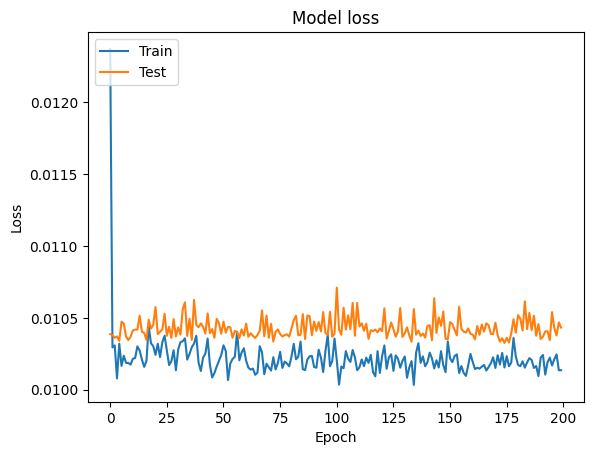

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Dropout

# Assume df1 is defined with a 'Sales' column
# df1 = pd.read_csv('your_data.csv')  # Uncomment and modify this line to read your data

# Scale the sales data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1['Sales'].values.reshape(-1, 1))

def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Build the improved RNN model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Inverse transform the actual values
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate R2 score
train_r2 = r2_score(Y_train, train_predict)
test_r2 = r2_score(Y_test, test_predict)

print(f'Train R2 Score: {train_r2:.2f}')
print(f'Test R2 Score: {test_r2:.2f}')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0128 - val_loss: 0.0105
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0088 - val_loss: 0.0103
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0109 - val_loss: 0.0106
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0091 - val_loss: 0.0103
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0098 - val_loss: 0.0104
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0121 - val_loss: 0.0106
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0116 - val_loss: 0.0103
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0104 - val_loss: 0.0104
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0138 - val_loss: 0.0105
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0102 - val_loss: 0.0104
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0120 - val_loss: 0.0104
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0

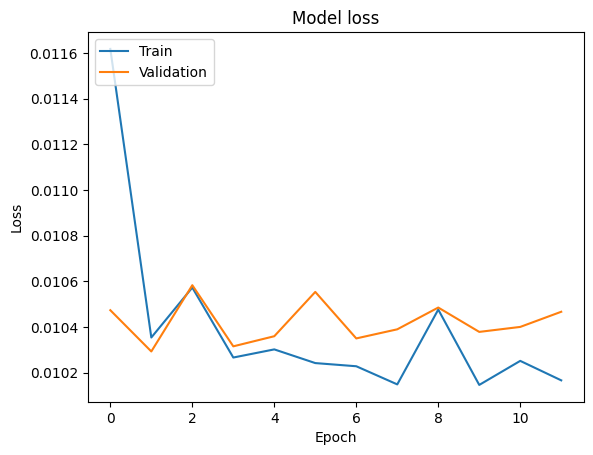

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Assume df1 is defined with a 'Sales' column
# df1 = pd.read_csv('your_data.csv')  # Uncomment and modify this line to read your data

# Feature engineering: create lag features
def create_lagged_features(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag + 1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.dropna(inplace=True)
    return df.values

# Parameters
time_step = 10

# Create lagged features
lagged_data = create_lagged_features(df1['Sales'].values, lag=time_step)

# Scale the lagged data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(lagged_data)

# Split the data into input and output
X, Y = scaled_data[:, :-1], scaled_data[:, -1]

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], time_step, 1)

# Split the data into training and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Build the improved RNN model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=64, verbose=1, callbacks=[early_stopping])

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], time_step))), axis=1))[:, 0]
test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], time_step))), axis=1))[:, 0]

# Inverse transform the actual values
Y_train = scaler.inverse_transform(np.concatenate((Y_train.reshape(-1, 1), np.zeros((Y_train.shape[0], time_step))), axis=1))[:, 0]
Y_test = scaler.inverse_transform(np.concatenate((Y_test.reshape(-1, 1), np.zeros((Y_test.shape[0], time_step))), axis=1))[:, 0]

# Calculate R2 score
train_r2 = r2_score(Y_train, train_predict)
test_r2 = r2_score(Y_test, test_predict)

print(f'Train R2 Score: {train_r2:.2f}')
print(f'Test R2 Score: {test_r2:.2f}')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - loss: 0.0129 - val_loss: 0.0101
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0096 - val_loss: 0.0103
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 0.0122 - val_loss: 0.0100
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - loss: 0.0103 - val_loss: 0.0100
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0098 - val_loss: 0.0100
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0093 - val_loss: 0.0100
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0106 - val_loss: 0.0100
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0115 - val_loss: 0.0104
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0120 - val_loss: 0.0

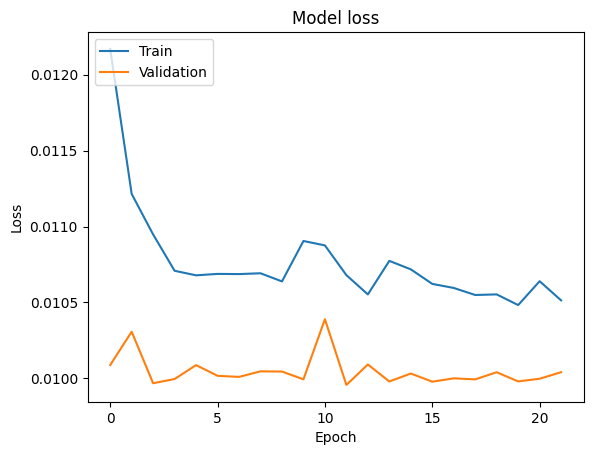

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping


df1['RollingMean'] = df1['Sales'].rolling(window=10).mean()
df1['RollingStd'] = df1['Sales'].rolling(window=10).std()
df1.dropna(inplace=True)

# Scale the sales data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1[['Sales', 'RollingMean', 'RollingStd']])

# Parameters
time_step = 20
# Create the dataset with rolling statistics as additional features
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), :])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

X, Y = create_dataset(scaled_data, time_step)

# Split the data into training and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Build the improved RNN model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=64, verbose=1, callbacks=[early_stopping])

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], 2))), axis=1))[:, 0]
test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], 2))), axis=1))[:, 0]

# Inverse transform the actual values
Y_train = scaler.inverse_transform(np.concatenate((Y_train.reshape(-1, 1), np.zeros((Y_train.shape[0], 2))), axis=1))[:, 0]
Y_test = scaler.inverse_transform(np.concatenate((Y_test.reshape(-1, 1), np.zeros((Y_test.shape[0], 2))), axis=1))[:, 0]

# Calculate R2 score
train_r2 = r2_score(Y_train, train_predict)
test_r2 = r2_score(Y_test, test_predict)

print(f'Train R2 Score: {train_r2:.2f}')
print(f'Test R2 Score: {test_r2:.2f}')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - loss: 0.0157 - val_loss: 0.0107
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0136 - val_loss: 0.0099
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0112 - val_loss: 0.0101
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0114 - val_loss: 0.0100
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0090 - val_loss: 0.0100
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0127 - val_loss: 0.0102
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0108 - val_loss: 0.0100
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0089 - val_loss: 0.0099
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0111 - val_loss: 0.0100
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0112 - val_loss: 0.0101
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0106 - val_loss: 0.0101


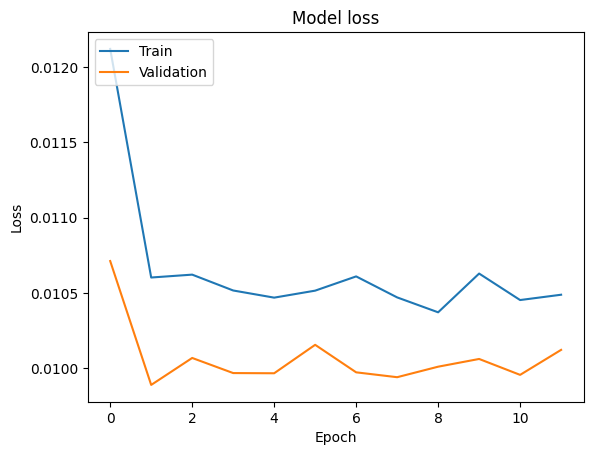

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Assume df1 is defined with a 'Sales' column
# df1 = pd.read_csv('your_data.csv')  # Uncomment and modify this line to read your data

# Compute exponential smoothing
df1['ExponentialSmoothing'] = df1['Sales'].ewm(span=10, adjust=False).mean()

# Scale the sales data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1[['Sales', 'ExponentialSmoothing']])

# Parameters
time_step = 10

# Create the dataset with exponential smoothing as an additional feature
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), :])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

X, Y = create_dataset(scaled_data, time_step)

# Split the data into training and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Build the improved RNN model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=64, verbose=1, callbacks=[early_stopping])

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], 1))), axis=1))[:, 0]
test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], 1))), axis=1))[:, 0]

# Inverse transform the actual values
Y_train = scaler.inverse_transform(np.concatenate((Y_train.reshape(-1, 1), np.zeros((Y_train.shape[0], 1))), axis=1))[:, 0]
Y_test = scaler.inverse_transform(np.concatenate((Y_test.reshape(-1, 1), np.zeros((Y_test.shape[0], 1))), axis=1))[:, 0]

# Calculate R2 score
train_r2 = r2_score(Y_train, train_predict)
test_r2 = r2_score(Y_test, test_predict)

print(f'Train R2 Score: {train_r2:.2f}')
print(f'Test R2 Score: {test_r2:.2f}')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00


[I 2024-08-05 06:57:43,613] A new study created in memory with name: no-name-ba016924-c762-4e3d-9573-7ce52ac12e1e


ADF Statistic: -11.334531
p-value: 0.000000
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
<ipython-input-22-7000325bf541>:79: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  model.add(Dropout(trial.suggest_uniform('dropout_l{}'.format(i), 0.2, 0.5)))
[I 2024-08-05 06:58:01,083] Trial 0 finished with value: 0.01020949985831976 and parameters: {'n_layers': 1, 'n_units_l0': 129, 'rnn_type': 'GRU', 'dropout_l0': 0.31655847066302867}. Best is trial 0 with value: 0.01020949985831976.
[I 2024-08-05 06:58:21,611] Trial 1 finished with value: 0.01004283782094717 and parameters: {'n_layers': 3, 'n_units_l0': 109, 'rnn_type': 'LSTM', 'dropout_l0': 0.4852389866155385

Number of finished trials: 30
Best trial: {'n_layers': 2, 'n_units_l0': 186, 'rnn_type': 'GRU', 'dropout_l0': 0.37647865646024103, 'n_units_l1': 159, 'dropout_l1': 0.33128216808557903}
Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - loss: 0.0214 - val_loss: 0.0109
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0115 - val_loss: 0.0121
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0121 - val_loss: 0.0104
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0101 - val_loss: 0.0105
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0118 - val_loss: 0.0101
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0099 - val_loss: 0.0101
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0096 - val_loss: 0.0100
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0116 - val_loss: 0.0102
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0111 - val_loss: 0.0100
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss:

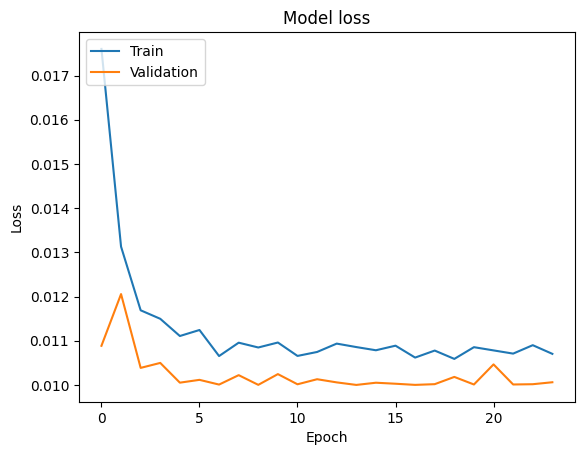

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Dropout, GRU
from tensorflow.keras.callbacks import EarlyStopping
import optuna
from statsmodels.tsa.stattools import adfuller

# Function to check stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    return result[1]

# Assume df1 is defined with a 'Sales' column
# df1 = pd.read_csv('your_data.csv')  # Uncomment and modify this line to read your data

# Check for stationarity
p_value = check_stationarity(df1['Sales'])
if p_value > 0.05:
    df1['Sales'] = df1['Sales'].diff().dropna()

# Compute exponential smoothing
df1['ExponentialSmoothing'] = df1['Sales'].ewm(span=10, adjust=False).mean()

# Compute rolling statistics
df1['RollingMean'] = df1['Sales'].rolling(window=10).mean()
df1['RollingStd'] = df1['Sales'].rolling(window=10).std()

# Drop NaN values created by rolling statistics
df1.dropna(inplace=True)

# Scale the sales data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1[['Sales', 'ExponentialSmoothing', 'RollingMean', 'RollingStd']])

# Parameters
time_step = 10

# Create the dataset with rolling statistics and exponential smoothing as additional features
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), :])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

X, Y = create_dataset(scaled_data, time_step)

# Split the data into training and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

def create_model(trial):
    model = Sequential()
    n_layers = trial.suggest_int('n_layers', 1, 3)
    for i in range(n_layers):
        num_hidden = trial.suggest_int('n_units_l{}'.format(i), 50, 200)
        rnn_type = trial.suggest_categorical('rnn_type', ['LSTM', 'GRU'])
        if rnn_type == 'LSTM':
            if i == 0:
                model.add(LSTM(num_hidden, return_sequences=True, input_shape=(time_step, X.shape[2])))
            else:
                model.add(LSTM(num_hidden, return_sequences=(i < n_layers - 1)))
        else:
            if i == 0:
                model.add(GRU(num_hidden, return_sequences=True, input_shape=(time_step, X.shape[2])))
            else:
                model.add(GRU(num_hidden, return_sequences=(i < n_layers - 1)))
        model.add(Dropout(trial.suggest_uniform('dropout_l{}'.format(i), 0.2, 0.5)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def objective(trial):
    model = create_model(trial)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=64, verbose=0, callbacks=[early_stopping])
    score = model.evaluate(X_test, Y_test, verbose=0)
    return score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, timeout=600)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

best_params = study.best_trial.params

# Train the final model with the best parameters
final_model = create_model(optuna.trial.FixedTrial(best_params))
history = final_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=64, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

# Make predictions
train_predict = final_model.predict(X_train)
test_predict = final_model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], 3))), axis=1))[:, 0]
test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], 3))), axis=1))[:, 0]

# Inverse transform the actual values
Y_train = scaler.inverse_transform(np.concatenate((Y_train.reshape(-1, 1), np.zeros((Y_train.shape[0], 3))), axis=1))[:, 0]
Y_test = scaler.inverse_transform(np.concatenate((Y_test.reshape(-1, 1), np.zeros((Y_test.shape[0], 3))), axis=1))[:, 0]

# Calculate R2 score
train_r2 = r2_score(Y_train, train_predict)
test_r2 = r2_score(Y_test, test_predict)

print(f'Train R2 Score: {train_r2:.2f}')
print(f'Test R2 Score: {test_r2:.2f}')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=64, callbacks=[early_stopping])

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Inverse transform the actual values
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate R2 score
train_r2 = r2_score(Y_train, train_predict)
test_r2 = r2_score(Y_test, test_predict)

print(f'Train R2 Score: {train_r2:.2f}')
print(f'Test R2 Score: {test_r2:.2f}')



Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 1625112.2500 - val_loss: 1867065.3750
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 1565643.2500 - val_loss: 1851964.0000
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 1532707.2500 - val_loss: 1843080.1250
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 1479494.5000 - val_loss: 1840391.5000
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 1578187.2500 - val_loss: 1838097.8750
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 1416413.2500 - val_loss: 1835952.3750
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1695059.5000 - val_loss: 1833895.7500
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 1728611.1250 - val_loss: 1831903.7500
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1630288.8750 - val_loss: 1829993.8750
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1662657.2500 - val_loss: 1828136.3750
Epoch 11/200
10/10 ━━━━━━━━━━━━